In [32]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('iplauction2023.csv')
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [4]:
df.shape

(309, 7)

In [5]:
df.describe() #outliers are present

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [6]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [10]:
df['base price (in lacs)'].dtype

dtype('float64')

In [11]:
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [65]:
print('Player styles --> ',df['player style'].unique())
print('Player styles --> ',df['player style'].nunique())

Player styles -->  ['Bowler' 'Batter' 'Allrounder' 'WK-Batter']
Player styles -->  4


In [66]:
print("Franchises -> ", df["franchise"].unique())
print("Franchises -> ", df["franchise"].nunique())

Franchises ->  ['KKR' nan 'RR' 'SRH' 'MI' 'LSG' 'DC' 'PBKS' 'CSK' 'RCB' 'GT']
Franchises ->  10


In [67]:
print("Players' Nationalities -> ", df["nationality"].unique())
print("Players' Nationalities -> ", df["nationality"].nunique())

Players' Nationalities ->  ['India' 'South Africa' 'Bangladesh' 'England' 'West Indies' 'Sri Lanka'
 'Afghanistan' 'Australia' 'Namibia' 'Ireland' 'Netherlands' 'New Zealand'
 'Zimbabwe' 'Singapore']
Players' Nationalities ->  14


In [12]:
df.loc[df.duplicated(subset = ['name'])]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status


1.How many players are there in each playing style category (Bowler, Batter, AllRounder, WK-Batter)?



In [68]:
cnts = df['player style'].value_counts()
cnts

player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64

2.Which playing style has the highest and lowest base price on average?

In [16]:
g1=df.groupby('player style')['base price (in lacs)'].mean().idxmax()
g2=df.groupby('player style')['base price (in lacs)'].mean().max()
g3=df.groupby('player style')['base price (in lacs)'].mean().idxmin()
g4=df.groupby('player style')['base price (in lacs)'].mean().min()

print(f'The playing style {g1} has a the highest base price on average of {round(g2,2)} lacs ')
print(f'The playing style {g3} has a the lowest base price on average of {round(g4,2)} lacs ')

The playing style Batter has a the highest base price on average of 75.65 lacs 
The playing style WK-Batter has a the lowest base price on average of 45.24 lacs 


# Franchise Analysis

How does the average final price vary across different franchises?

In [70]:
grp1 = df.groupby('franchise')['final price (in lacs)'].mean().sort_values().reset_index()
grp1

,franchise,final price (in lacs)
0,KKR,337.368421
1,SRH,353.800000
2,DC,361.875000
3,GT,362.200000
4,LSG,362.600000
5,RR,366.600000
6,RCB,373.000000
7,CSK,374.000000
8,PBKS,376.363636
9,MI,409.565217


In [71]:
grp1['franchise'].value_counts()

franchise
KKR     1
SRH     1
DC      1
GT      1
LSG     1
RR      1
RCB     1
CSK     1
PBKS    1
MI      1
Name: count, dtype: int64

In [72]:
grp1['franchise'].values

array(['KKR', 'SRH', 'DC', 'GT', 'LSG', 'RR', 'RCB', 'CSK', 'PBKS', 'MI'],
      dtype=object)

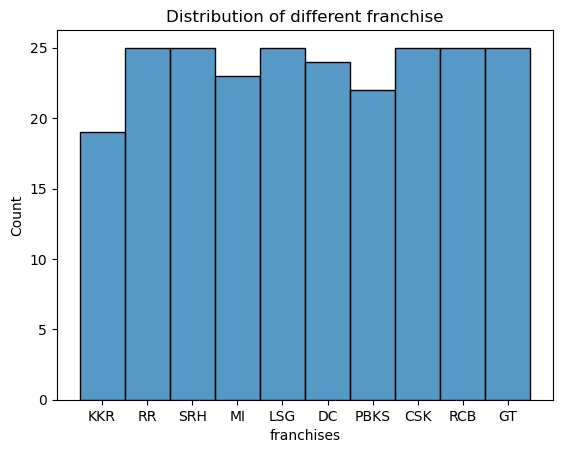

In [75]:
sns.histplot(df['franchise'])
plt.title('Distribution of different franchise')
plt.xlabel('franchises')
plt.ylabel('Count')

plt.show()

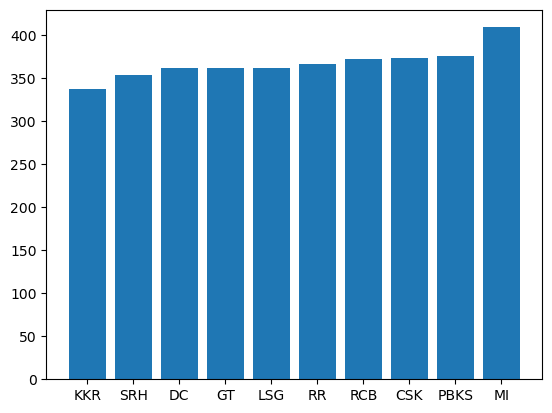

In [73]:
plt.bar(grp1['franchise'],grp1['final price (in lacs)'])
plt.show()

([<matplotlib.patches.Wedge at 0x2c55aee23d0>,
 [Text(1.0546280314543328, 0.31266550060849196, 'KKR'),
  Text(0.7019824218813635, 0.8468888235002134, 'SRH'),
  Text(0.08868442290407308, 1.0964192050188521, 'DC'),
  Text(-0.5635388212863147, 0.9446819554237454, 'GT'),
  Text(-1.0071917771626997, 0.44222700507300866, 'LSG'),
  Text(-1.0760099408021389, -0.22847889901471777, 'RR'),
  Text(-0.7333286622153347, -0.8198957697009223, 'RCB'),
  Text(-0.10057217693135774, -1.0953927319584003, 'CSK'),
  Text(0.574469449228249, -0.9380750779673195, 'PBKS'),
  Text(1.315173101062213, -0.47991636171566654, 'MI')],
 [Text(0.5752516535205451, 0.17054481851372286, '9.17'),
  Text(0.38289950284438007, 0.46193935827284366, '9.62'),
  Text(0.04837332158403986, 0.598046839101192, '9.84'),
  Text(-0.3073848116107171, 0.5152810665947701, '9.85'),
  Text(-0.5493773329978361, 0.24121473003982288, '9.86'),
  Text(-0.5869145131648029, -0.12462485400802786, '9.97'),
  Text(-0.39999745211745524, -0.44721587438232

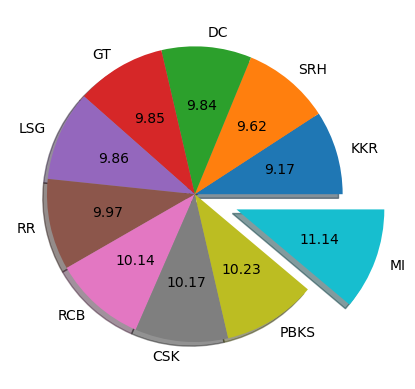

In [74]:
plt.pie(grp1['final price (in lacs)'],labels = ['KKR', 'SRH', 'DC', 'GT', 'LSG', 'RR', 'RCB', 'CSK', 'PBKS', 'MI'],autopct = '%.2f',explode=[0,0,0,0,0,0,0,0,0,.3],shadow = True)

Which franchises have retained the most players?



In [39]:
st=df.groupby('status')['franchise'].value_counts()
st1=st.loc['RETAINED'].reset_index()
st1.max()

franchise    SRH
count         19
dtype: object

# Player Prices

What is the average base price and final price of players across different nationalities?

In [40]:
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [41]:
df_pp = df.groupby('nationality')[['base price (in lacs)','final price (in lacs)']].mean()

df_pp

,base price (in lacs),final price (in lacs)
nationality,,
Afghanistan,67.500000,407.500000
Australia,136.428571,591.818182
Bangladesh,83.333333,133.333333
England,136.470588,745.666667
India,25.444444,323.456790
Ireland,50.000000,440.000000
Namibia,100.000000,100.000000
Netherlands,20.000000,NaN
New Zealand,160.000000,221.250000


In [45]:
df['nationality'].nunique()

14

In [46]:
df[df['nationality'] == 'Singapore']

name                     1
player style             1
nationality              1
base price (in lacs)     0
final price (in lacs)    1
franchise                1
status                   1
dtype: int64

In [49]:
df[df['nationality'] == 'India'].nunique()

name                     201
player style               4
nationality                1
base price (in lacs)       5
final price (in lacs)     54
franchise                 10
status                     3
dtype: int64

How many players remained unsold, and what was their average base price?

In [51]:
df[df['status'] == 'UNSOLD'] #-->71 unsold players

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
10,Luke Wood,Bowler,England,100.0,NaN,NaN,UNSOLD
11,Dilshan Madushanka,Bowler,Sri Lanka,50.0,NaN,NaN,UNSOLD
...,...,...,...,...,...,...,...
137,Mujeeb Ur Rahman,Bowler,Afghanistan,100.0,NaN,NaN,UNSOLD
138,Tabraiz Shamsi,Bowler,South Africa,100.0,NaN,NaN,UNSOLD
141,Adam Milne,Bowler,New Zealand,200.0,NaN,NaN,UNSOLD
143,Chris Jordan,Bowler,England,200.0,NaN,NaN,UNSOLD


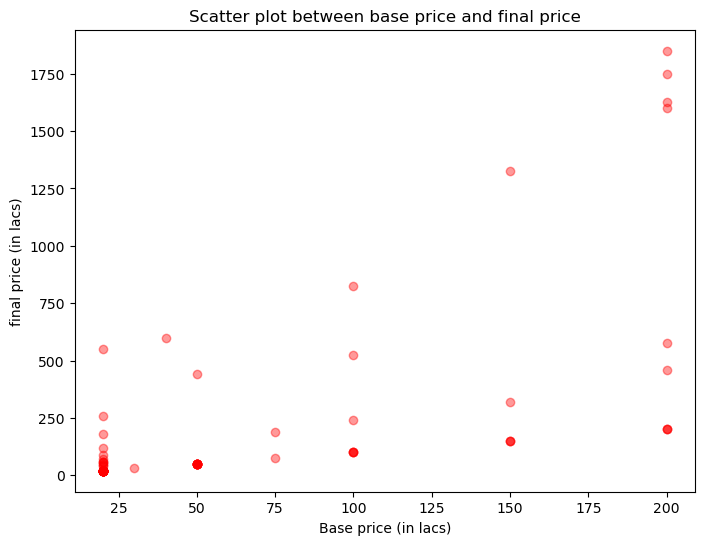

In [78]:
plt.figure(figsize = (8,6))

plt.scatter(df['base price (in lacs)'],df['final price (in lacs)'],color = 'red',alpha = 0.4)
plt.title('Scatter plot between base price and final price')
plt.xlabel('Base price (in lacs)')
plt.ylabel('final price (in lacs)')

plt.show()

In [81]:
df_proc = df[df["base price (in lacs)"].isna()]
DF = df_proc[df_proc['status'] == 'RETAINED']
DF #158 players are retained hence their base price is NaN

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
152,Rajat Patidar,Batter,India,NaN,20.0,RCB,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,NaN,20.0,CSK,RETAINED
154,Tristan Stubbs,WK-Batter,South Africa,NaN,20.0,MI,RETAINED
155,Ravi Bishnoi,Bowler,India,NaN,400.0,LSG,RETAINED
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [76]:
x_=nat['nationality']
y_=nat['base price (in lacs)']
y1=nat['final price (in lacs)']

nat.plot(kind='bar',x='nationality')
plt.xticks(rotation=30)
plt.title
plt.show()

KeyError: 'nationality'

# Status Analysis

What percentage of players were retained, sold, and remained unsold?

In [58]:
stt = df['status'].value_counts().reset_index()
stt

,status,count
0,RETAINED,158
1,SOLD,80
2,UNSOLD,71


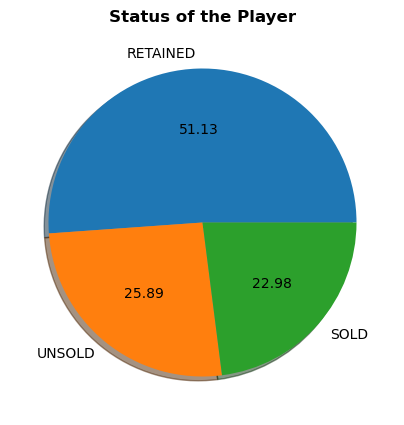

In [61]:
plt.figure(figsize = (5,5))

plt.pie(stt['count'],labels = ['RETAINED', 'UNSOLD', 'SOLD'],autopct = '%.2f',shadow = True)
plt.title('Status of the Player',fontweight = 'bold')
plt.show()

In [62]:
data = df.groupby('status')[['base price (in lacs)','final price (in lacs)']].mean().reset_index()

data

,status,base price (in lacs),final price (in lacs)
0,RETAINED,NaN,448.734177
1,SOLD,62.375000,208.750000
2,UNSOLD,55.633803,NaN


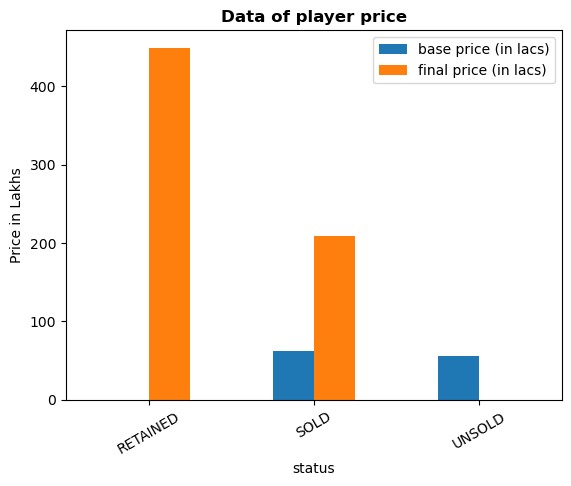

In [63]:
data.plot(kind = 'bar',x = 'status')
plt.xticks(rotation = 30)
plt.ylabel('Price in Lakhs')
plt.title('Data of player price',fontweight = 'bold')

plt.show()

# Player's Styles

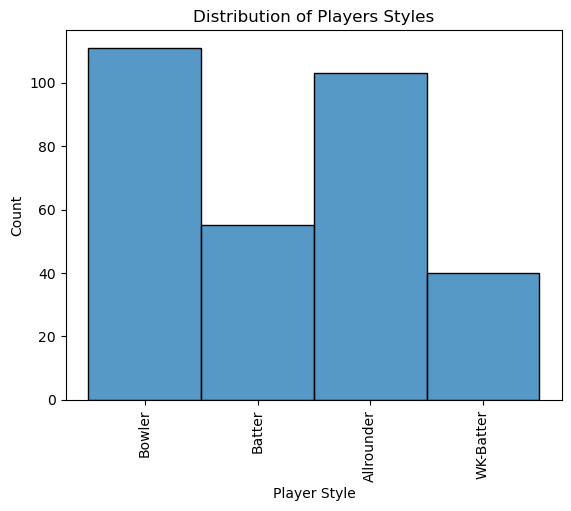

In [69]:
sns.histplot(df['player style'])
plt.title('Distribution of Players Styles')
plt.xlabel('Player Style')
plt.ylabel('Count')

plt.xticks(rotation = 90)
plt.show()

# Model Building

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

One Hot Encoder

In [100]:
df_encoded = pd.get_dummies(df, columns=["player style","nationality","franchise"],dtype=int)
df_encoded

,name,base price (in lacs),final price (in lacs),status,player style_Allrounder,player style_Batter,player style_Bowler,player style_WK-Batter,nationality_Afghanistan,nationality_Australia,...,franchise_CSK,franchise_DC,franchise_GT,franchise_KKR,franchise_LSG,franchise_MI,franchise_PBKS,franchise_RCB,franchise_RR,franchise_SRH
0,Harshit Rana,NaN,20.0,RETAINED,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Ekant Sen,20.0,NaN,UNSOLD,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Wayne Parnell,75.0,NaN,UNSOLD,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shakib Al Hasan,150.0,150.0,SOLD,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Joe Root,100.0,100.0,SOLD,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,MS Dhoni,NaN,1200.0,RETAINED,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
305,Moeen Ali,NaN,800.0,RETAINED,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
306,Ruturaj Gaikwad,NaN,600.0,RETAINED,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
307,Rishabh Pant,NaN,1600.0,RETAINED,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [101]:
df['status'].value_counts()

status
RETAINED    158
SOLD         80
UNSOLD       71
Name: count, dtype: int64

In [102]:
df['status'].value_counts()
df_encoded['status'] = df_encoded['status'].map({"RETAINED":0,"SOLD" :1,"UNSOLD": 2}).astype(int)

df_encoded['final price (in lacs)'] =df_encoded["final price (in lacs)"].fillna(0)

In [103]:
df_encoded=df_encoded.drop(columns=["name","base price (in lacs)"])
df_encoded

,final price (in lacs),status,player style_Allrounder,player style_Batter,player style_Bowler,player style_WK-Batter,nationality_Afghanistan,nationality_Australia,nationality_Bangladesh,nationality_England,...,franchise_CSK,franchise_DC,franchise_GT,franchise_KKR,franchise_LSG,franchise_MI,franchise_PBKS,franchise_RCB,franchise_RR,franchise_SRH
0,20.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,150.0,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,100.0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1200.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
305,800.0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
306,600.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
307,1600.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [104]:
X=df_encoded.drop(columns="status")
y=df_encoded.status

Split dataset into training set and test set

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

# Predict the Model

In [106]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6989247311827957
